In [792]:
#Libraries 
import os
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score,f1_score

### Step 1: Data Wrangling - data merging, cleaning, and preprocessing

#### Import static, progress and financial aid data and merge them to create a master data with a unique row per student ID with all the relevant columns required later in the modeling part.

In [793]:
# Get the current working directory
current_directory = os.getcwd()

# Set the current working directory to a new path
new_directory = '/Users/shashankbaluni/Documents/Machine Learning for Business Part 1/Final Exam'
os.chdir(new_directory)

# Get the updated current working directory
updated_directory = os.getcwd()
print("Updated Current Working Directory:", updated_directory)

Updated Current Working Directory: /Users/shashankbaluni/Documents/Machine Learning for Business Part 1/Final Exam


In [794]:
# Load financial aid dataset

df_fin = pd.read_excel('Student Financial Aid Data/2011-2017_Cohorts_Financial_Aid_and_Fafsa_Data.xlsx')
df_fin.head()

,ID with leading,cohort,cohort term,Marital Status,Adjusted Gross Income,Parent Adjusted Gross Income,Father's Highest Grade Level,Mother's Highest Grade Level,Housing,2012 Loan,...,2015 Work/Study,2015 Grant,2016 Loan,2016 Scholarship,2016 Work/Study,2016 Grant,2017 Loan,2017 Scholarship,2017 Work/Study,2017 Grant
0,297957,2011-12,1,Single,0.0,0.0,College,High School,On Campus Housing,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,302040,2011-12,1,Single,18096.0,0.0,High School,High School,Off Campus,12500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,234532,2011-12,1,Single,12383.0,0.0,High School,High School,Off Campus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,303486,2011-12,1,Married,59303.0,0.0,High School,Middle School,Off Campus,4750.0,...,NaN,4580.0,NaN,NaN,NaN,691.0,8385.0,NaN,NaN,2233.0
4,304316,2011-12,1,Single,25133.0,0.0,Unknown,High School,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [795]:
# Load Progress data

# Replace 'your_folder_path' with the path to your folder containing csv files
folder_path = 'Student Progress Data/*.csv'

csv_files = glob.glob(folder_path)
# Create an empty list to store DataFrames
dfs1 = {}

# Loop through each CSV file and read it into a DataFrame
for i, csv_file in enumerate(csv_files):
    df_name = f'df{i + 1}'  # Create DataFrame name (e.g., df1, df2, ...)
    dfs1[df_name] = pd.read_csv(csv_file)
    
# Concatenate all DataFrames into a single DataFrame
concatenated_df = pd.concat(dfs1.values(), ignore_index=True)

# Display the concatenated DataFrame
concatenated_df.head()

,StudentID,Cohort,CohortTerm,Term,AcademicYear,CompleteDevMath,CompleteDevEnglish,Major1,Major2,Complete1,Complete2,CompleteCIP1,CompleteCIP2,TransferIntent,DegreeTypeSought,TermGPA,CumGPA
0,300304,2011-12,1,1,2016-17,0,-2,9.0101,-1.0,0,0,-2.0000,-2,-1,6,3.58,2.91
1,299369,2011-12,1,1,2016-17,0,0,52.1401,-1.0,8,0,52.1401,-2,-1,6,3.68,3.47
2,299788,2011-12,1,1,2016-17,0,0,54.0101,-1.0,0,0,-2.0000,-2,-1,6,0.00,2.35
3,300895,2011-12,1,1,2016-17,0,0,51.0999,-1.0,0,0,-2.0000,-2,-1,6,2.63,2.86
4,297755,2011-12,1,1,2016-17,-2,0,52.0301,-1.0,0,0,-2.0000,-2,-1,6,0.75,1.99


In [796]:
# create dataframe with unique row per student based on his/her most recent academic record

# Sort the DataFrame by 'Academic_Year' and 'Term' in descending order
concatenated_df.sort_values(by=['StudentID', 'AcademicYear', 'Term'], ascending=[True, False, False], inplace=True)

# Drop duplicates, keeping only the first occurrence (highest academic year and term)
result_df = concatenated_df.drop_duplicates(subset='StudentID', keep='first')

# Display the result DataFrame
result_df.head()

,StudentID,Cohort,CohortTerm,Term,AcademicYear,CompleteDevMath,CompleteDevEnglish,Major1,Major2,Complete1,Complete2,CompleteCIP1,CompleteCIP2,TransferIntent,DegreeTypeSought,TermGPA,CumGPA
18000,20932,2014-15,1,1,2014-15,-2,-2,0.0000,-1.0,0,0,-2.0000,-2,-1,6,0.00,0.00
11024,21868,2014-15,1,6,2016-17,-2,-2,23.0101,-1.0,7,0,23.0101,-2,-1,6,4.00,3.82
7375,21943,2012-13,1,3,2012-13,-2,-2,26.0101,-1.0,0,0,-2.0000,-2,-1,6,0.00,0.00
21433,22011,2011-12,1,3,2014-15,0,0,42.0101,-1.0,7,0,42.0101,-2,-1,6,3.15,3.30
26620,22163,2013-14,3,3,2016-17,-2,-2,52.0201,-1.0,0,0,-2.0000,-2,-1,6,4.00,3.30


In [797]:
# Check for duplicates based on all columns
duplicates = result_df.duplicated(subset=['StudentID']).sum()
print(duplicates)

0


In [798]:
# Load static data

# Replace 'your_folder_path' with the path to your folder containing csv files
folder_path = 'Student Static Data/*.csv'

csv_files = glob.glob(folder_path)
# Create an empty list to store DataFrames
dfs2 = {}

# Loop through each CSV file and read it into a DataFrame
for i, csv_file in enumerate(csv_files):
    df_name = f'df{i + 1}'  # Create DataFrame name (e.g., df1, df2, ...)
    dfs2[df_name] = pd.read_csv(csv_file)
    
# Concatenate all DataFrames into a single DataFrame
concatenated_df2 = pd.concat(dfs2.values(), ignore_index=True)

# Display the concatenated DataFrame
concatenated_df2.head()

,StudentID,Cohort,CohortTerm,Campus,Address1,Address2,City,State,Zip,RegistrationDate,...,DualHSSummerEnroll,EnrollmentStatus,NumColCredAttemptTransfer,NumColCredAcceptTransfer,CumLoanAtEntry,HighDeg,MathPlacement,EngPlacement,GatewayMathStatus,GatewayEnglishStatus
0,27936,2015-16,3,NaN,61 Neptune Ave,NaN,Jersey City,NJ,7305.0,20150116,...,0,2,102.0,66.0,-1,2,0,0,0,0
1,44318,2015-16,3,NaN,400 Armstrong Ave,NaN,Jersey City,NJ,7305.0,20150122,...,0,2,79.0,66.0,-1,2,0,0,0,0
2,67421,2015-16,3,NaN,96 Ocean Avenue,Apt. 2,Jersey City,NJ,7305.0,20160106,...,0,2,91.0,66.0,-1,2,0,0,0,0
3,70833,2015-16,3,NaN,79 Pearsall Ave,NaN,Jersey City,NJ,7305.0,20150119,...,0,2,0.0,0.0,-1,2,0,0,0,0
4,90356,2015-16,3,NaN,192 Olean Ave,NaN,Jersey City,NJ,7306.0,20160105,...,0,2,67.0,64.0,-1,0,0,0,1,0


In [799]:
#merge progress and static datasets based on only common values of student IDs

merged_df = pd.merge(result_df, concatenated_df2, on=['StudentID', 'Cohort', 'CohortTerm'], how='inner')
merged_df.head()

,StudentID,Cohort,CohortTerm,Term,AcademicYear,CompleteDevMath,CompleteDevEnglish,Major1,Major2,Complete1,...,DualHSSummerEnroll,EnrollmentStatus,NumColCredAttemptTransfer,NumColCredAcceptTransfer,CumLoanAtEntry,HighDeg,MathPlacement,EngPlacement,GatewayMathStatus,GatewayEnglishStatus
0,20932,2014-15,1,1,2014-15,-2,-2,0.0000,-1.0,0,...,0,2,81.0,65.0,-1,0,0,0,0,0
1,21868,2014-15,1,6,2016-17,-2,-2,23.0101,-1.0,7,...,0,2,71.0,66.0,-1,0,0,0,0,0
2,21943,2012-13,1,3,2012-13,-2,-2,26.0101,-1.0,0,...,0,2,81.0,81.0,-1,0,0,0,0,0
3,22011,2011-12,1,3,2014-15,0,0,42.0101,-1.0,7,...,0,1,-2.0,-2.0,-2,0,1,1,0,0
4,22163,2013-14,3,3,2016-17,-2,-2,52.0201,-1.0,0,...,0,2,91.0,81.0,-1,0,0,0,0,0


In [800]:
# merge data with financial aid data based on student ID and create a master data with common values in all dataframes

final_data = pd.merge(merged_df, df_fin, left_on='StudentID', right_on='ID with leading',how='inner')
final_data.head()

,StudentID,Cohort,CohortTerm,Term,AcademicYear,CompleteDevMath,CompleteDevEnglish,Major1,Major2,Complete1,...,2015 Work/Study,2015 Grant,2016 Loan,2016 Scholarship,2016 Work/Study,2016 Grant,2017 Loan,2017 Scholarship,2017 Work/Study,2017 Grant
0,20932,2014-15,1,1,2014-15,-2,-2,0.0000,-1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21868,2014-15,1,6,2016-17,-2,-2,23.0101,-1.0,7,...,NaN,4260.0,5500.0,NaN,NaN,2888.0,12500.0,NaN,NaN,NaN
2,21943,2012-13,1,3,2012-13,-2,-2,26.0101,-1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22011,2011-12,1,3,2014-15,0,0,42.0101,-1.0,7,...,NaN,8966.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22163,2013-14,3,3,2016-17,-2,-2,52.0201,-1.0,0,...,NaN,3582.0,5079.0,1000.0,NaN,3610.0,3500.0,3500.0,NaN,3635.0


### Step 2a: Data Wrangling and Feature Engineering - missing values, omitted data, and features re-engineered

#### Check data for single values, missing values, drop columns with >70% missing values and replace the remaining columns with missing values with proper measures.

In [801]:
master_data = final_data

# moving average of loan
master_data['MovingAverageLoan'] = master_data[['2012 Loan', '2013 Loan', '2014 Loan', '2015 Loan', '2016 Loan', '2017 Loan']].mean(axis=1).rolling(window=3, min_periods=1).mean()
master_data['MovingAverageLoan'] = master_data['MovingAverageLoan'].fillna(0)

# create aggregated columns with total for 2012 to 2016 for scholarship, grant, work/study
#master_data['Total_Loan'] = master_data['2012 Loan'].fillna(0) + master_data['2013 Loan'].fillna(0) + master_data['2014 Loan'].fillna(0) + master_data['2015 Loan'].fillna(0) + master_data['2016 Loan'].fillna(0) + master_data['2017 Loan'].fillna(0)
master_data['Total Scholarship'] = master_data['2012 Scholarship'].fillna(0) + master_data['2013 Scholarship'].fillna(0) + master_data['2014 Scholarship'].fillna(0) + master_data['2015 Scholarship'].fillna(0) + master_data['2016 Scholarship'].fillna(0) + master_data['2017 Scholarship'].fillna(0)
master_data['Total Work/Study'] = master_data['2012 Work/Study'].fillna(0) + master_data['2013 Work/Study'].fillna(0) + master_data['2014 Work/Study'].fillna(0) + master_data['2015 Work/Study'].fillna(0) + master_data['2016 Work/Study'].fillna(0) + master_data['2017 Work/Study'].fillna(0)
master_data['Total Grant'] = master_data['2012 Grant'].fillna(0) + master_data['2013 Grant'].fillna(0) + master_data['2014 Grant'].fillna(0) + master_data['2015 Grant'].fillna(0) + master_data['2016 Grant'].fillna(0) + master_data['2017 Grant'].fillna(0)

master_data.drop(columns=['2012 Loan','2013 Loan','2014 Loan','2015 Loan','2016 Loan','2017 Loan','2012 Scholarship','2013 Scholarship','2014 Scholarship','2015 Scholarship','2016 Scholarship','2017 Scholarship','2012 Work/Study','2013 Work/Study','2014 Work/Study','2015 Work/Study','2016 Work/Study','2017 Work/Study','2012 Grant','2013 Grant','2014 Grant','2015 Grant','2016 Grant','2017 Grant'], inplace=True)
master_data.head()

,StudentID,Cohort,CohortTerm,Term,AcademicYear,CompleteDevMath,CompleteDevEnglish,Major1,Major2,Complete1,...,Marital Status,Adjusted Gross Income,Parent Adjusted Gross Income,Father's Highest Grade Level,Mother's Highest Grade Level,Housing,MovingAverageLoan,Total Scholarship,Total Work/Study,Total Grant
0,20932,2014-15,1,1,2014-15,-2,-2,0.0000,-1.0,0,...,Married,52555.0,0.0,Unknown,Unknown,Off Campus,0.000000,0.0,0.0,0.0
1,21868,2014-15,1,6,2016-17,-2,-2,23.0101,-1.0,7,...,Single,30600.0,0.0,High School,High School,Off Campus,8500.000000,0.0,0.0,7148.0
2,21943,2012-13,1,3,2012-13,-2,-2,26.0101,-1.0,0,...,Single,27879.0,0.0,Unknown,High School,Off Campus,6749.000000,0.0,0.0,0.0
3,22011,2011-12,1,3,2014-15,0,0,42.0101,-1.0,7,...,Single,8845.0,0.0,College,College,Off Campus,7266.666667,0.0,0.0,44945.0
4,22163,2013-14,3,3,2016-17,-2,-2,52.0201,-1.0,0,...,Single,26794.0,0.0,Unknown,College,Off Campus,5477.416667,4750.0,0.0,12238.0


In [802]:
# student age as of last academic_year

# Fill missing values with mode for each cohort
cohort_mode = master_data.groupby('Cohort')['BirthYear'].apply(lambda x: x.mode().iloc[0])
master_data['BirthYear'] = master_data.apply(lambda row: cohort_mode[row['Cohort']] if pd.isnull(row['BirthYear']) else row['BirthYear'], axis=1)

master_data['StudentAge'] = master_data['AcademicYear'].apply(lambda x: x[:4]).astype(int) - master_data['BirthYear'].astype(int)+1

In [803]:
# city, zip, state engineered feature
zip_counts = master_data[master_data['State']=='NJ']['Zip'].value_counts()
proximity_zip = zip_counts[zip_counts>100].index

# create zip proximity flag
master_data['zip_prox'] = np.where(master_data['Zip'].isin(proximity_zip),1,0)

# replace missing zip with mode value
master_data['zip_prox'] = master_data['zip_prox'].fillna(master_data['zip_prox'].mode().iloc[0])

In [804]:
# check columns with only single values and drop those

single_val_cols = master_data.columns[master_data.nunique() == 1]
master_data = master_data.drop(columns=single_val_cols)
master_data.head()

,StudentID,Cohort,CohortTerm,Term,AcademicYear,CompleteDevMath,CompleteDevEnglish,Major1,Major2,Complete1,...,Parent Adjusted Gross Income,Father's Highest Grade Level,Mother's Highest Grade Level,Housing,MovingAverageLoan,Total Scholarship,Total Work/Study,Total Grant,StudentAge,zip_prox
0,20932,2014-15,1,1,2014-15,-2,-2,0.0000,-1.0,0,...,0.0,Unknown,Unknown,Off Campus,0.000000,0.0,0.0,0.0,44,1
1,21868,2014-15,1,6,2016-17,-2,-2,23.0101,-1.0,7,...,0.0,High School,High School,Off Campus,8500.000000,0.0,0.0,7148.0,37,1
2,21943,2012-13,1,3,2012-13,-2,-2,26.0101,-1.0,0,...,0.0,Unknown,High School,Off Campus,6749.000000,0.0,0.0,0.0,31,1
3,22011,2011-12,1,3,2014-15,0,0,42.0101,-1.0,7,...,0.0,College,College,Off Campus,7266.666667,0.0,0.0,44945.0,33,1
4,22163,2013-14,3,3,2016-17,-2,-2,52.0201,-1.0,0,...,0.0,Unknown,College,Off Campus,5477.416667,4750.0,0.0,12238.0,35,1


In [805]:
# check columns with missing values as % of total values

md = master_data.isnull().sum()/master_data.shape[0]*100
md[md > 0]

Campus                          100.000000
Address1                          0.852123
Address2                         97.066586
City                              0.859664
State                             0.852123
Zip                               1.010482
Marital Status                   15.021492
Adjusted Gross Income            15.021492
Parent Adjusted Gross Income     15.021492
Father's Highest Grade Level     16.039514
Mother's Highest Grade Level     17.638187
Housing                          15.202473
dtype: float64

In [806]:
# remove columns with %missing value > 70%

# Identify columns with more than 70% null values
columns_to_drop = md[md > 70].index

# Drop the columns with more than 70% null values
master_data = master_data.drop(columns=columns_to_drop)

# Display the modified DataFrame
master_data.head()

,StudentID,Cohort,CohortTerm,Term,AcademicYear,CompleteDevMath,CompleteDevEnglish,Major1,Major2,Complete1,...,Parent Adjusted Gross Income,Father's Highest Grade Level,Mother's Highest Grade Level,Housing,MovingAverageLoan,Total Scholarship,Total Work/Study,Total Grant,StudentAge,zip_prox
0,20932,2014-15,1,1,2014-15,-2,-2,0.0000,-1.0,0,...,0.0,Unknown,Unknown,Off Campus,0.000000,0.0,0.0,0.0,44,1
1,21868,2014-15,1,6,2016-17,-2,-2,23.0101,-1.0,7,...,0.0,High School,High School,Off Campus,8500.000000,0.0,0.0,7148.0,37,1
2,21943,2012-13,1,3,2012-13,-2,-2,26.0101,-1.0,0,...,0.0,Unknown,High School,Off Campus,6749.000000,0.0,0.0,0.0,31,1
3,22011,2011-12,1,3,2014-15,0,0,42.0101,-1.0,7,...,0.0,College,College,Off Campus,7266.666667,0.0,0.0,44945.0,33,1
4,22163,2013-14,3,3,2016-17,-2,-2,52.0201,-1.0,0,...,0.0,Unknown,College,Off Campus,5477.416667,4750.0,0.0,12238.0,35,1


In [807]:
# replace missing values with appropriate measures

# Replace null values in object variables with mode in columns_to_fill_mode
columns_to_fill_mode = ['Marital Status',"Father's Highest Grade Level","Mother's Highest Grade Level",'Housing'] 
master_data[columns_to_fill_mode] = master_data[columns_to_fill_mode].fillna(master_data[columns_to_fill_mode].mode().iloc[0])

# Replace null values in income columns with mean
columns_to_fill_mean = ['Adjusted Gross Income', 'Parent Adjusted Gross Income']
master_data[columns_to_fill_mean] = master_data[columns_to_fill_mean].fillna(master_data[columns_to_fill_mean].mean())

# Drop columns which can't be replaced or are repetitive
columns_to_drop = ['Address1', 'City','State', 'Zip', 'ID with leading', 'cohort term', 'cohort','BirthYear','BirthMonth']
master_data = master_data.drop(columns=columns_to_drop)

# Identify float columns and convert them to int
float_columns = master_data.select_dtypes(include='float').columns
master_data[float_columns] = master_data[float_columns].astype(int)

# Display the DataFrame after filling null values
master_data.head()

,StudentID,Cohort,CohortTerm,Term,AcademicYear,CompleteDevMath,CompleteDevEnglish,Major1,Major2,Complete1,...,Parent Adjusted Gross Income,Father's Highest Grade Level,Mother's Highest Grade Level,Housing,MovingAverageLoan,Total Scholarship,Total Work/Study,Total Grant,StudentAge,zip_prox
0,20932,2014-15,1,1,2014-15,-2,-2,0,-1,0,...,0,Unknown,Unknown,Off Campus,0,0,0,0,44,1
1,21868,2014-15,1,6,2016-17,-2,-2,23,-1,7,...,0,High School,High School,Off Campus,8500,0,0,7148,37,1
2,21943,2012-13,1,3,2012-13,-2,-2,26,-1,0,...,0,Unknown,High School,Off Campus,6749,0,0,0,31,1
3,22011,2011-12,1,3,2014-15,0,0,42,-1,7,...,0,College,College,Off Campus,7266,0,0,44945,33,1
4,22163,2013-14,3,3,2016-17,-2,-2,52,-1,0,...,0,Unknown,College,Off Campus,5477,4750,0,12238,35,1


In [808]:
# no missing values after replacing with appropriate measures
master_data.isnull().sum().sum()

0

### Step 2b: Exploratory Data Analysis - descriptive and statistical summaries

In [809]:
# Summary statistics of numerical variables
master_data.describe()

,StudentID,CohortTerm,Term,CompleteDevMath,CompleteDevEnglish,Major1,Major2,Complete1,CompleteCIP1,TermGPA,...,GatewayMathStatus,GatewayEnglishStatus,Adjusted Gross Income,Parent Adjusted Gross Income,MovingAverageLoan,Total Scholarship,Total Work/Study,Total Grant,StudentAge,zip_prox
count,13261.000000,13261.000000,13261.000000,13261.000000,13261.000000,13261.000000,13261.000000,13261.000000,13261.000000,13261.000000,...,13261.000000,13261.000000,1.326100e+04,13261.000000,13261.000000,13261.000000,13261.000000,13261.000000,13261.000000,13261.000000
mean,316150.611266,1.391222,2.990046,-1.271548,-1.436543,38.187844,0.041927,2.160244,10.964935,2.220572,...,0.119750,0.190182,1.304547e+04,28316.426665,6719.472815,1165.265817,212.844054,9782.170575,26.784330,0.587060
std,45170.648889,0.793371,1.560801,1.001927,0.949234,16.716307,5.853482,3.460927,21.500747,1.325917,...,0.324681,0.392459,3.305242e+04,39704.709589,4680.802899,4798.952026,983.571829,12640.034431,8.177625,0.492381
min,20932.000000,1.000000,1.000000,-2.000000,-2.000000,-1.000000,-1.000000,0.000000,-2.000000,0.000000,...,0.000000,0.000000,-2.432600e+04,-62979.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000
25%,305254.000000,1.000000,3.000000,-2.000000,-2.000000,26.000000,-1.000000,0.000000,-2.000000,1.000000,...,0.000000,0.000000,0.000000e+00,0.000000,4333.000000,0.000000,0.000000,0.000000,21.000000,0.000000
50%,321478.000000,1.000000,3.000000,-2.000000,-2.000000,43.000000,-1.000000,0.000000,-2.000000,3.000000,...,0.000000,0.000000,6.745000e+03,20102.000000,6208.000000,0.000000,0.000000,5346.000000,24.000000,1.000000
75%,343511.000000,1.000000,3.000000,0.000000,-1.000000,51.000000,-1.000000,7.000000,26.000000,3.000000,...,0.000000,0.000000,1.326500e+04,32999.000000,8500.000000,0.000000,0.000000,14179.000000,29.000000,1.000000
max,359783.000000,3.000000,6.000000,1.000000,1.000000,54.000000,54.000000,8.000000,54.000000,4.000000,...,1.000000,1.000000,2.576425e+06,657631.000000,47500.000000,125497.000000,14820.000000,80873.000000,71.000000,1.000000


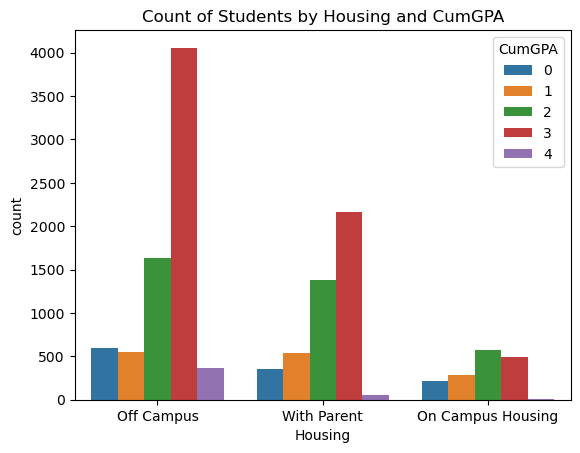

Student count by Marital Status:


Single       11850
Married        992
Divorced       226
Separated      193
Name: Marital Status, dtype: int64

In [810]:
# countplot for categorical variables

sns.countplot(x='Housing', hue='CumGPA', data=master_data)
plt.title('Count of Students by Housing and CumGPA')
plt.show()
# students who live on campus have comparatively low cumulative GPA

print("Student count by Marital Status:")
master_data['Marital Status'].value_counts()
# most of the students in the data are single and this feature may not be meaningful in explaining target variable

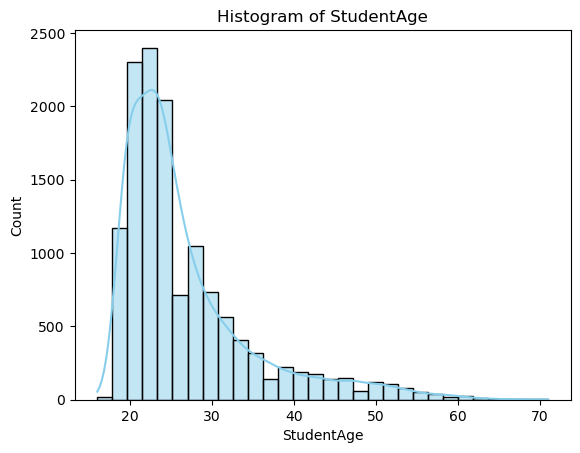

In [811]:
# distribution of students with grant

# Using Seaborn
sns.histplot(master_data['StudentAge'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of StudentAge')
plt.show()
# most of the students are in 20-25 years of age-groups with some outliers from age buckets outside this group.

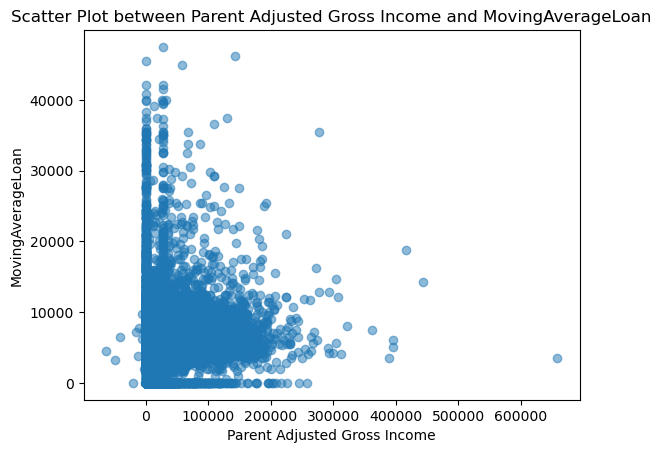

In [812]:
# scatterplot
plt.scatter(master_data['Parent Adjusted Gross Income'], master_data['MovingAverageLoan'], alpha=0.5)
plt.title('Scatter Plot between Parent Adjusted Gross Income and MovingAverageLoan')
plt.xlabel('Parent Adjusted Gross Income')
plt.ylabel('MovingAverageLoan')
plt.show()
# there is no correlation between parent adjusted income and total_loan

### Step 2c: Feature Engineering - one-hot encoding

In [813]:
# convert object variables into binary by using one-hot encoding
object_columns = master_data.select_dtypes(include='object').columns

# Apply one-hot encoding to object columns
master_data1 = pd.get_dummies(master_data, columns=object_columns)

# Display the DataFrame after one-hot encoding
master_data1.head()

,StudentID,CohortTerm,Term,CompleteDevMath,CompleteDevEnglish,Major1,Major2,Complete1,CompleteCIP1,TermGPA,...,Father's Highest Grade Level_High School,Father's Highest Grade Level_Middle School,Father's Highest Grade Level_Unknown,Mother's Highest Grade Level_College,Mother's Highest Grade Level_High School,Mother's Highest Grade Level_Middle School,Mother's Highest Grade Level_Unknown,Housing_Off Campus,Housing_On Campus Housing,Housing_With Parent
0,20932,1,1,-2,-2,0,-1,0,-2,0,...,0,0,1,0,0,0,1,1,0,0
1,21868,1,6,-2,-2,23,-1,7,23,4,...,1,0,0,0,1,0,0,1,0,0
2,21943,1,3,-2,-2,26,-1,0,-2,0,...,0,0,1,0,1,0,0,1,0,0
3,22011,1,3,0,0,42,-1,7,42,3,...,0,0,0,1,0,0,0,1,0,0
4,22163,3,3,-2,-2,52,-1,0,-2,4,...,0,0,1,1,0,0,0,1,0,0


### Step 2d: Exploratory Data Analysis - with dropout variable

#### Separate the data into training and test based on test IDs that provided in testids.csv file. We will call the test dataset Kaggletest just to differentiate it from other test datasets. Set the kaggletest dataset aside.

In [814]:
test_student_ids = pd.read_csv('Test Data/TestIDs.csv')
test_student_ids.head()

,StudentID
0,344883
1,298782
2,311983
3,346945
4,313391


In [815]:
# Create the training dataset by excluding the test student IDs
training_dataset = master_data1[~master_data1['StudentID'].isin(test_student_ids['StudentID'])]

# Create the test (Kaggletest) dataset using the selected test student IDs
kaggletest_dataset = master_data1[master_data1['StudentID'].isin(test_student_ids['StudentID'])]

#### Add the Dropout labels column to the train dataset by joining to the data in droppoutTrainlabels.csv file.

In [816]:
dropout_labels = pd.read_csv('DropoutTrainLabels.csv')
dropout_labels.head()

,StudentID,Dropout
0,285848,0
1,302176,0
2,301803,0
3,302756,0
4,301067,0


In [817]:
train_data_with_Dlabels = pd.merge(training_dataset, dropout_labels, on='StudentID', how='left')
train_data_with_Dlabels.head()

,StudentID,CohortTerm,Term,CompleteDevMath,CompleteDevEnglish,Major1,Major2,Complete1,CompleteCIP1,TermGPA,...,Father's Highest Grade Level_Middle School,Father's Highest Grade Level_Unknown,Mother's Highest Grade Level_College,Mother's Highest Grade Level_High School,Mother's Highest Grade Level_Middle School,Mother's Highest Grade Level_Unknown,Housing_Off Campus,Housing_On Campus Housing,Housing_With Parent,Dropout
0,20932,1,1,-2,-2,0,-1,0,-2,0,...,0,1,0,0,0,1,1,0,0,1
1,21868,1,6,-2,-2,23,-1,7,23,4,...,0,0,0,1,0,0,1,0,0,0
2,21943,1,3,-2,-2,26,-1,0,-2,0,...,0,1,0,1,0,0,1,0,0,1
3,22163,3,3,-2,-2,52,-1,0,-2,4,...,0,1,1,0,0,0,1,0,0,0
4,22672,1,1,-2,-2,52,-1,0,-2,1,...,0,0,0,1,0,0,1,0,0,1


#### Some exploratory analysis using dropout label before getting into modeling.

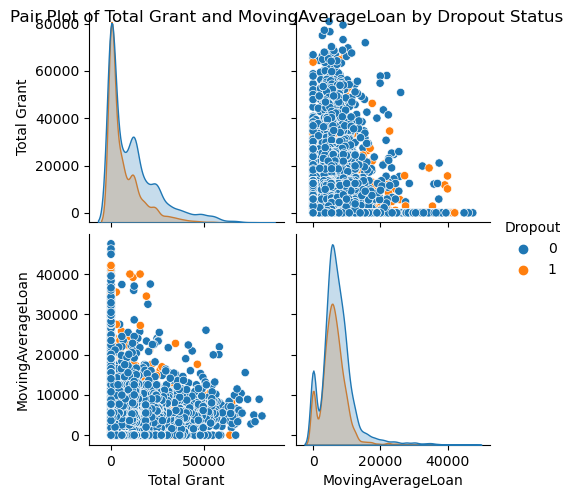

In [818]:
# dropout rate by Total Grant and MovingAverageLoan
sns.pairplot(train_data_with_Dlabels[['Total Grant', 'MovingAverageLoan', 'Dropout']], hue='Dropout')
plt.suptitle('Pair Plot of Total Grant and MovingAverageLoan by Dropout Status')
plt.show()

#### No big differences but students who didn't dropout had a comparatively high average grant than those who didn't. 

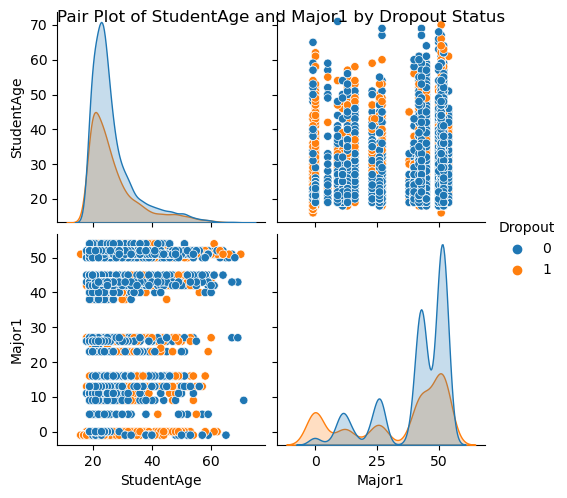

In [819]:
# dropout rate by StudentAge and Major1
sns.pairplot(train_data_with_Dlabels[['StudentAge', 'Major1', 'Dropout']], hue='Dropout')
plt.suptitle('Pair Plot of StudentAge and Major1 by Dropout Status')
plt.show()

#### More students dropped out when in lower age groups and in lower major groups.

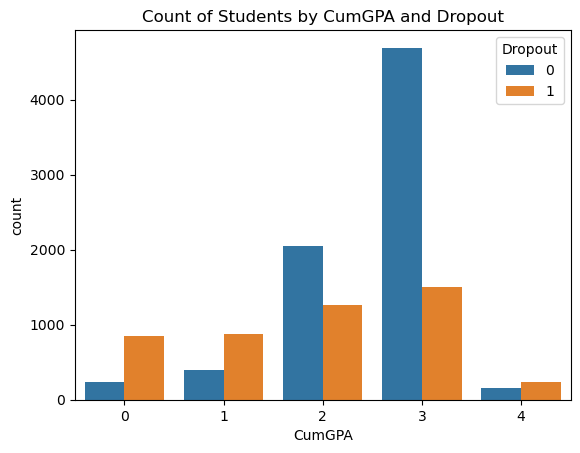

In [820]:
# dropout rate by student's CompleteCIP1 and Major1
sns.countplot(x='CumGPA', hue='Dropout', data=train_data_with_Dlabels)
plt.title('Count of Students by CumGPA and Dropout')
plt.show()

#### Less students dropped out who had higher cumulative GPAs.

### Step 3: Modeling - train/test datasets and different types of models with hyperparameter tuning

In [821]:
# Assume 'Dropout' is the target variable
X = train_data_with_Dlabels.drop(['StudentID', 'Dropout'], axis=1)
y = train_data_with_Dlabels['Dropout']
 
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model 1: Random forest classifier with hyperparameter tuning and feature importance

In [822]:
# Initialize and train a RandomForestClassifier 
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy without hyperparameter tuning: {accuracy}')

# best model results based on grid search 
best_model = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=7, min_samples_leaf=1, random_state=42)
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Test accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, digits=3))

Model Accuracy without hyperparameter tuning: 0.9486343253159397
[[1496   23]
 [  94  840]]
Test accuracy score: 0.9523
              precision    recall  f1-score   support

           0      0.941     0.985     0.962      1519
           1      0.973     0.899     0.935       934

    accuracy                          0.952      2453
   macro avg      0.957     0.942     0.949      2453
weighted avg      0.953     0.952     0.952      2453



                     Feature  Importance
50      AcademicYear_2016-17    0.210574
7               CompleteCIP1    0.137799
6                  Complete1    0.129513
10          RegistrationDate    0.091593
44            Cohort_2016-17    0.038716
..                       ...         ...
13            AmericanIndian    0.000614
52    Marital Status_Married    0.000492
51   Marital Status_Divorced    0.000420
16            NativeHawaiian    0.000413
53  Marital Status_Separated    0.000178

[66 rows x 2 columns]


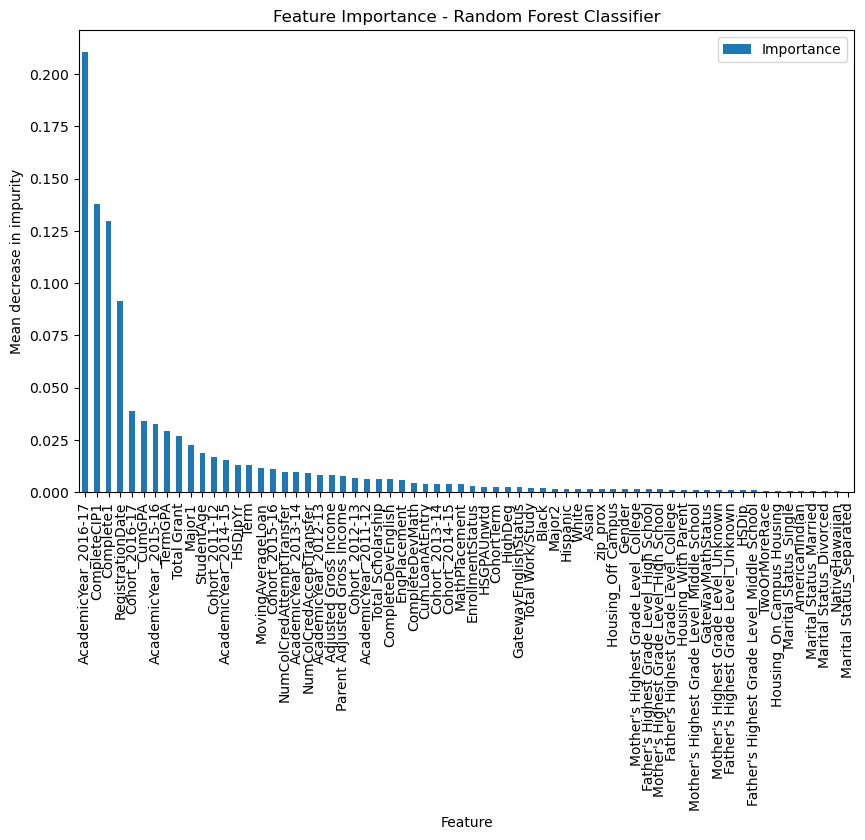

In [823]:
# Get feature importances

f_importance = best_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': f_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print(feature_importance)
feature_importance.plot(x='Feature', y='Importance', kind='bar', figsize=(10, 6))
plt.title('Feature Importance - Random Forest Classifier')
plt.ylabel("Mean decrease in impurity")
plt.show()

#### Re-run the model with only high feature importamce variables without being correlated with other x-variables

In [824]:
# removing those features with feature importance <= 0.01

feature_importance1 = feature_importance[feature_importance['Importance'] <= 0.01]
drop_list = feature_importance1['Feature'].tolist()

train_data_with_Dlabels1 = train_data_with_Dlabels.drop(columns=drop_list)
kaggletest_dataset1 = kaggletest_dataset.drop(columns=drop_list)

In [825]:
# drop columns with high correlation

train_data_with_Dlabels1 = train_data_with_Dlabels1.drop(columns='Complete1')
kaggletest_dataset1 = kaggletest_dataset1.drop(columns='Complete1')

Correlation Matrix:


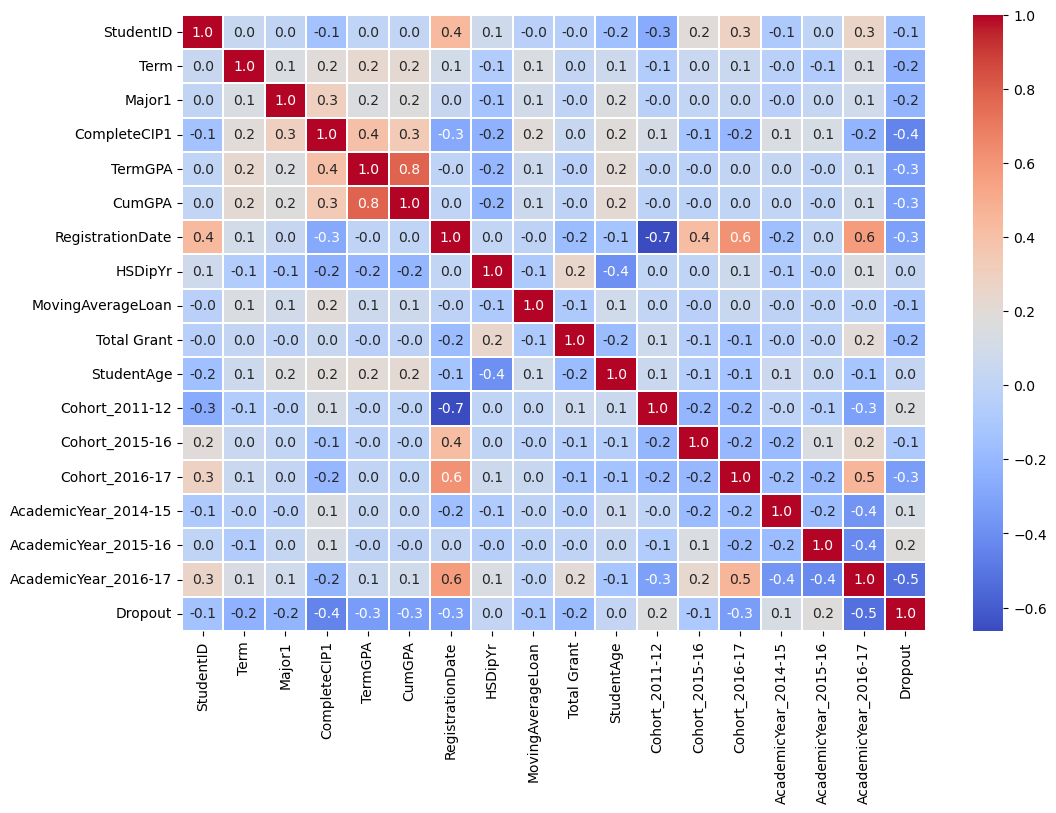

In [826]:
print("Correlation Matrix:")
correlation_matrix = train_data_with_Dlabels1.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [827]:
# Assume 'Dropout' is the target variable
X = train_data_with_Dlabels1.drop(['StudentID', 'Dropout'], axis=1)
y = train_data_with_Dlabels1['Dropout']
 
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [828]:
# Initialize and train a RandomForestClassifier 
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy without hyperparameter tuning: {accuracy}')

# best model results based on grid search 
best_model = RandomForestClassifier(n_estimators=150, 
                                    max_depth=20, 
                                    min_samples_split=7, 
                                    min_samples_leaf=2, 
                                    random_state=42)

best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Test accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, digits=3))

Model Accuracy without hyperparameter tuning: 0.9502649816551162
[[1489   30]
 [  91  843]]
Test accuracy score: 0.9507
              precision    recall  f1-score   support

           0      0.942     0.980     0.961      1519
           1      0.966     0.903     0.933       934

    accuracy                          0.951      2453
   macro avg      0.954     0.941     0.947      2453
weighted avg      0.951     0.951     0.950      2453



                 Feature  Importance
2           CompleteCIP1    0.289639
15  AcademicYear_2016-17    0.268499
5       RegistrationDate    0.102368
4                 CumGPA    0.048841
3                TermGPA    0.045214
12        Cohort_2016-17    0.040272
8            Total Grant    0.037029
9             StudentAge    0.032507
1                 Major1    0.032375
14  AcademicYear_2015-16    0.023604
7      MovingAverageLoan    0.021771
0                   Term    0.017290
6                HSDipYr    0.014561
10        Cohort_2011-12    0.011084
11        Cohort_2015-16    0.008745
13  AcademicYear_2014-15    0.006202


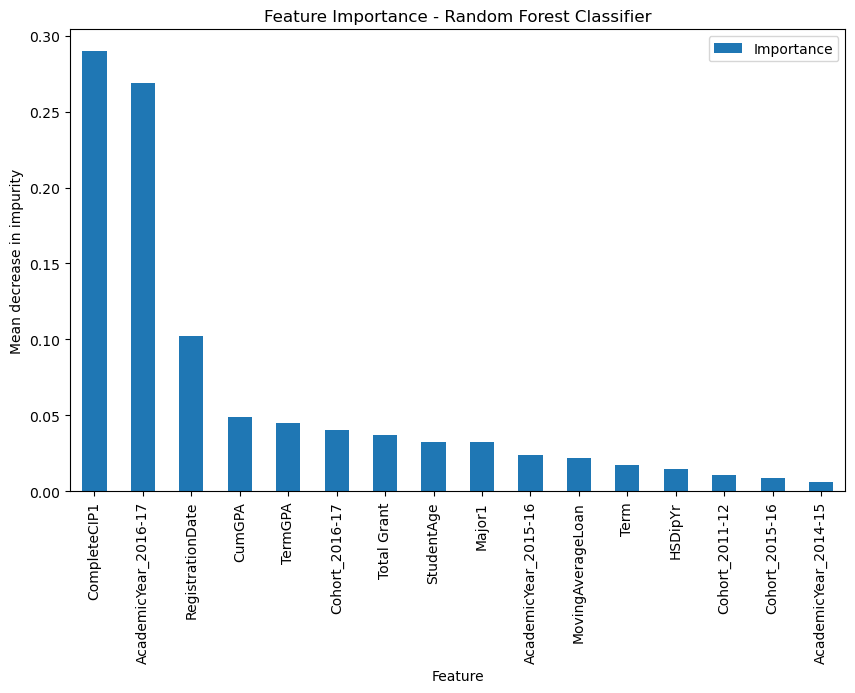

In [829]:
# Get feature importances

f_importance = best_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': f_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print(feature_importance)
feature_importance.plot(x='Feature', y='Importance', kind='bar', figsize=(10, 6))
plt.title('Feature Importance - Random Forest Classifier')
plt.ylabel("Mean decrease in impurity")
plt.show()

#### Predict using the Kaggletest dataset. This will result in a column with 1s and 0s in the prediction object you create. 

In [830]:
best_model.fit(X, y)

# Predict on the test set
test_x = kaggletest_dataset1.drop(['StudentID'], axis=1)
y_pred = best_model.predict(test_x)
pd.Series(y_pred).value_counts()

0    645
1    355
dtype: int64

#### Combine this prediction column with the student ID column in the kaggletest dataset and create a new dataframe that has two columns Student ID and Dropout

In [831]:
result_df = pd.DataFrame({'StudentID': kaggletest_dataset2['StudentID'], 'Dropout': y_pred})
result_df.head()

,StudentID,Dropout
3,22011,0
10,25142,0
16,26586,1
32,30958,0
46,34474,1


In [832]:
# export the result in csv format

result_df.to_csv('final_test_output.csv', index=False)
#0.93121

#### Model 2: Gradient Boosting with hyperparameter tuning

In [833]:
# Assume 'Dropout' is the target variable
X = train_data_with_Dlabels.drop(['StudentID', 'Dropout'], axis=1)
y = train_data_with_Dlabels['Dropout']
 
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [834]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Test accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, digits=3))

gb_model.fit(X, y)

# Predict on the test set
test_x = kaggletest_dataset.drop(['StudentID'], axis=1)
y_pred = gb_model.predict(test_x)
print(pd.Series(y_pred).value_counts())

# Train the model with the best parameters
best_gb_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=200,random_state=42)
best_gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_gb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Test accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, digits=3))

[[1490   29]
 [  89  845]]
Test accuracy score: 0.9519
              precision    recall  f1-score   support

           0      0.944     0.981     0.962      1519
           1      0.967     0.905     0.935       934

    accuracy                          0.952      2453
   macro avg      0.955     0.943     0.948      2453
weighted avg      0.952     0.952     0.952      2453

0    645
1    355
dtype: int64
[[1479   40]
 [  81  853]]
Test accuracy score: 0.9507
              precision    recall  f1-score   support

           0      0.948     0.974     0.961      1519
           1      0.955     0.913     0.934       934

    accuracy                          0.951      2453
   macro avg      0.952     0.943     0.947      2453
weighted avg      0.951     0.951     0.950      2453



                     Feature  Importance
7               CompleteCIP1    0.314123
50      AcademicYear_2016-17    0.306907
6                  Complete1    0.245349
10          RegistrationDate    0.046900
36               Total Grant    0.018375
..                       ...         ...
25            CumLoanAtEntry    0.000018
48      AcademicYear_2014-15    0.000011
47      AcademicYear_2013-14    0.000010
53  Marital Status_Separated    0.000004
45      AcademicYear_2011-12    0.000000

[66 rows x 2 columns]


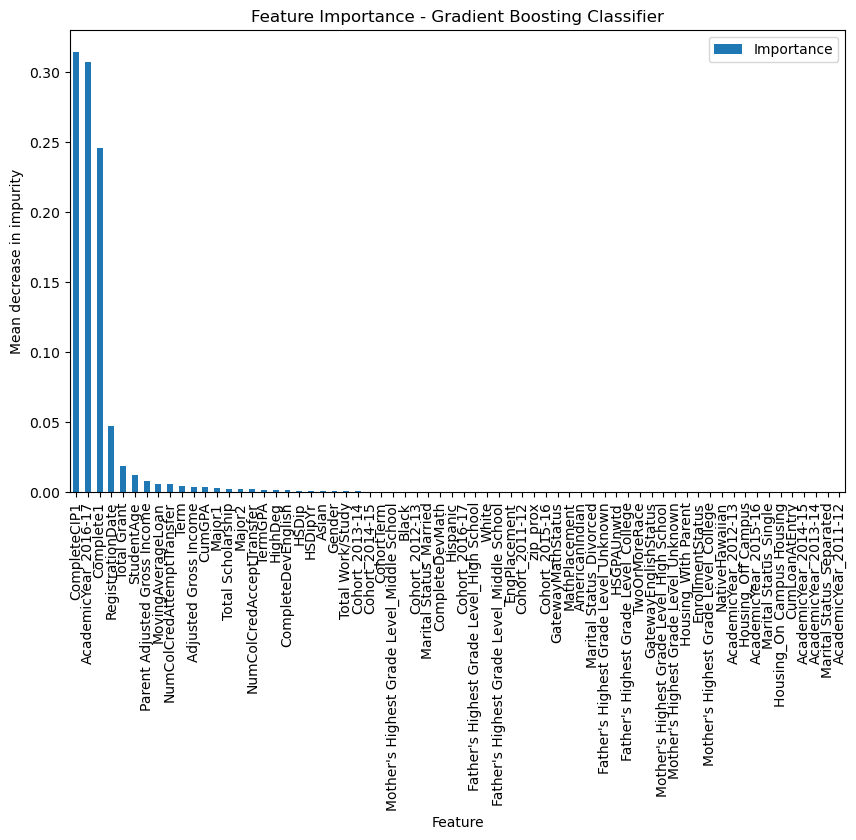

In [835]:
# Get feature importances

f_importance = best_gb_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': f_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print(feature_importance)
feature_importance.plot(x='Feature', y='Importance', kind='bar', figsize=(10, 6))
plt.title('Feature Importance - Gradient Boosting Classifier')
plt.ylabel("Mean decrease in impurity")
plt.show()

In [836]:
# removing those features with feature importance <= 0.001

feature_importance1 = feature_importance[feature_importance['Importance'] <= 0.001]
drop_list = feature_importance1['Feature'].tolist()

train_data_with_Dlabels2 = train_data_with_Dlabels.drop(columns=drop_list)
kaggletest_dataset2 = kaggletest_dataset.drop(columns=drop_list)

In [837]:
# drop columns with high correlation

train_data_with_Dlabels2 = train_data_with_Dlabels2.drop(columns='Complete1')
kaggletest_dataset2 = kaggletest_dataset2.drop(columns='Complete1')

Correlation Matrix:


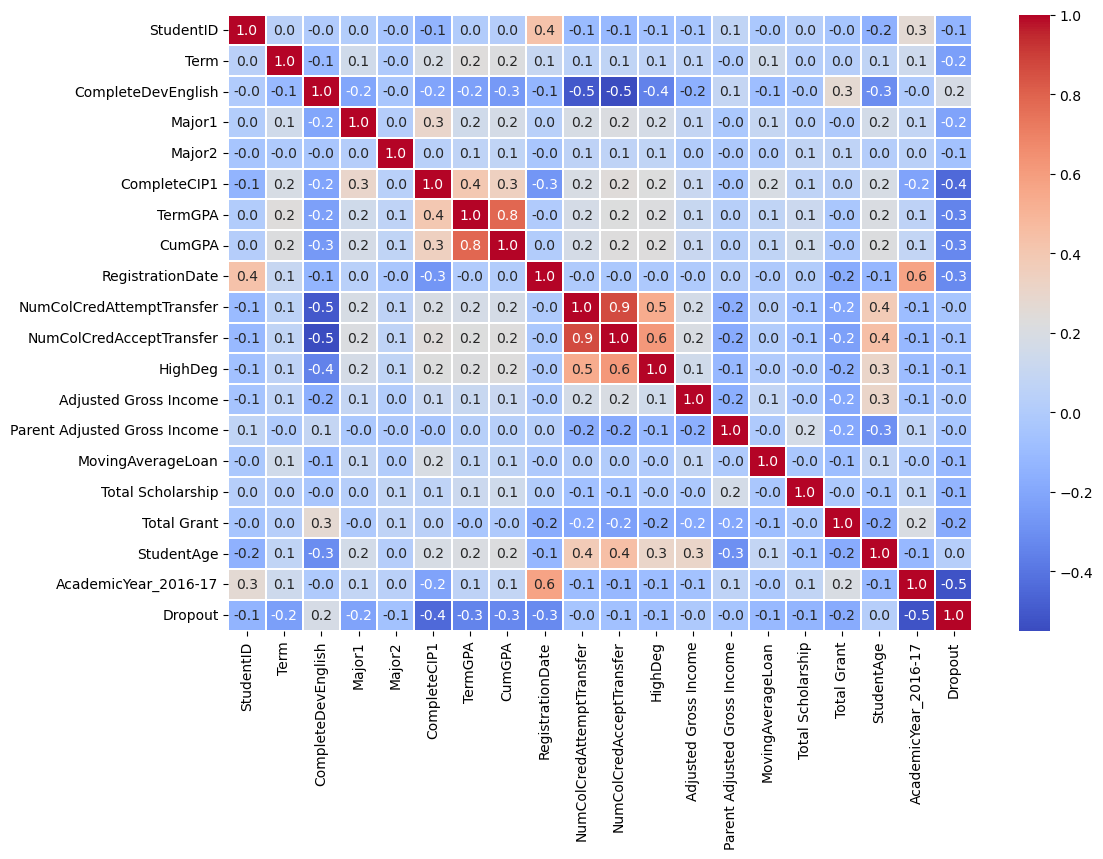

In [838]:
print("Correlation Matrix:")
correlation_matrix = train_data_with_Dlabels2.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [839]:
# Assume 'Dropout' is the target variable
X = train_data_with_Dlabels2.drop(['StudentID', 'Dropout'], axis=1)
y = train_data_with_Dlabels2['Dropout']
 
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [840]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Test accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, digits=3))

gb_model.fit(X, y)

# Predict on the test set
test_x = kaggletest_dataset2.drop(['StudentID'], axis=1)
y_pred = gb_model.predict(test_x)
print(pd.Series(y_pred).value_counts())

# Train the model with the best parameters
best_gb_model = GradientBoostingClassifier(learning_rate=0.1, 
                                           max_depth=5, 
                                           n_estimators=200,
                                           random_state=42)

best_gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_gb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Test accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, digits=3))

[[1487   32]
 [  89  845]]
Test accuracy score: 0.9507
              precision    recall  f1-score   support

           0      0.944     0.979     0.961      1519
           1      0.964     0.905     0.933       934

    accuracy                          0.951      2453
   macro avg      0.954     0.942     0.947      2453
weighted avg      0.951     0.951     0.950      2453

0    645
1    355
dtype: int64
[[1480   39]
 [  83  851]]
Test accuracy score: 0.9503
              precision    recall  f1-score   support

           0      0.947     0.974     0.960      1519
           1      0.956     0.911     0.933       934

    accuracy                          0.950      2453
   macro avg      0.952     0.943     0.947      2453
weighted avg      0.950     0.950     0.950      2453



                         Feature  Importance
4                   CompleteCIP1    0.560417
17          AcademicYear_2016-17    0.306876
7               RegistrationDate    0.048213
15                   Total Grant    0.019230
16                    StudentAge    0.012576
12  Parent Adjusted Gross Income    0.009275
13             MovingAverageLoan    0.007474
8      NumColCredAttemptTransfer    0.006783
11         Adjusted Gross Income    0.005033
0                           Term    0.004799
6                         CumGPA    0.003813
2                         Major1    0.003129
9       NumColCredAcceptTransfer    0.002630
14             Total Scholarship    0.002320
3                         Major2    0.002243
5                        TermGPA    0.001930
1             CompleteDevEnglish    0.001799
10                       HighDeg    0.001461


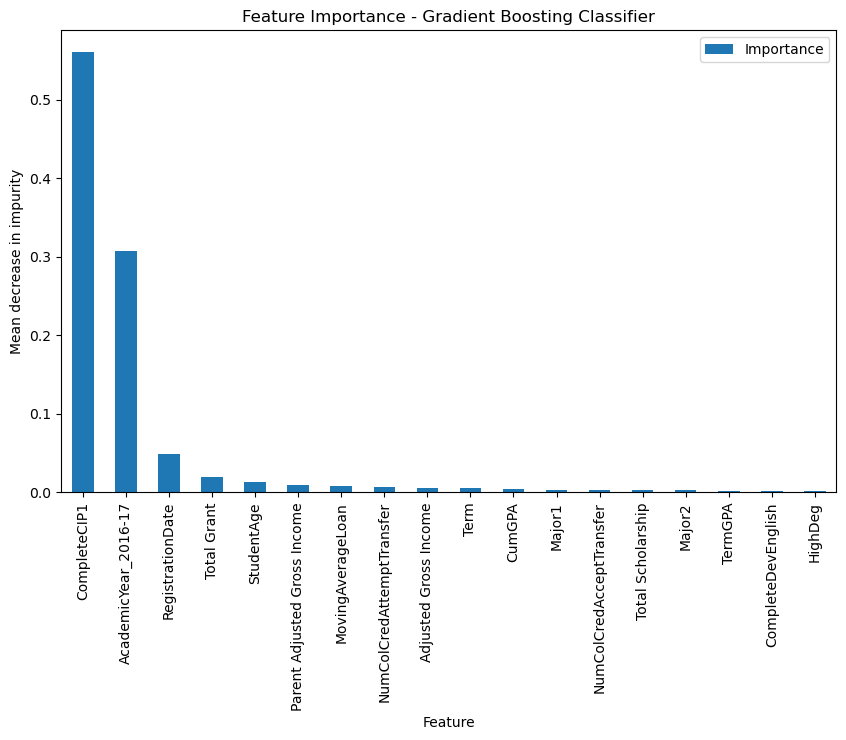

In [841]:
# Get feature importances

f_importance = best_gb_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': f_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print(feature_importance)
feature_importance.plot(x='Feature', y='Importance', kind='bar', figsize=(10, 6))
plt.title('Feature Importance - Gradient Boosting Classifier')
plt.ylabel("Mean decrease in impurity")
plt.show()

In [842]:
best_gb_model.fit(X, y)

# Predict on the test set
test_x = kaggletest_dataset2.drop(['StudentID'], axis=1)
y_pred = best_gb_model.predict(test_x)
print(pd.Series(y_pred).value_counts())

0    642
1    358
dtype: int64


In [843]:
result_df = pd.DataFrame({'StudentID': kaggletest_dataset2['StudentID'], 'Dropout': y_pred})
result_df.head()

,StudentID,Dropout
3,22011,0
10,25142,0
16,26586,1
32,30958,0
46,34474,1


In [844]:
# export the result in csv format

result_df.to_csv('final_test_output.csv', index=False)
#0.91534

#### Model 3: Logistic Regression with ROC

In [845]:
# Assume 'Dropout' is the target variable
X = train_data_with_Dlabels1.drop(['StudentID', 'Dropout'], axis=1)
y = train_data_with_Dlabels1['Dropout']
 
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [846]:
#Logistic Regression 
model = LogisticRegressionCV(cv=10, max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.6591928251121076


[[1385  134]
 [ 702  232]]
Test accuracy score: 0.6592
              precision    recall  f1-score   support

           0      0.664     0.912     0.768      1519
           1      0.634     0.248     0.357       934

    accuracy                          0.659      2453
   macro avg      0.649     0.580     0.563      2453
weighted avg      0.652     0.659     0.612      2453



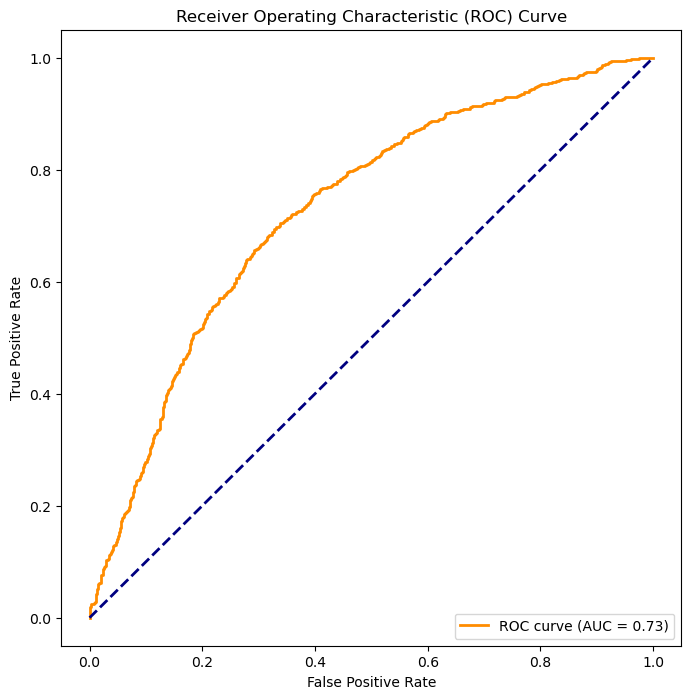

In [847]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(confusion_matrix(y_test, y_pred))
print('Test accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, digits=3))

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [848]:
# Get the coefficients (direction) and corresponding feature names
coefficients = model.coef_[0]
feature_names = X_train.columns

# Create a DataFrame with coefficients and features
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort features by coefficient in descending order
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Display the coefficients
print('Feature Coefficients:')
print(coefficients_df)

Feature Coefficients:
                 Feature   Coefficient
9             StudentAge  1.527314e-04
10        Cohort_2011-12  5.649887e-05
14  AcademicYear_2015-16  5.208309e-05
6                HSDipYr  4.604563e-05
13  AcademicYear_2014-15  3.466028e-05
5       RegistrationDate  1.847592e-08
11        Cohort_2015-16 -3.224132e-05
8            Total Grant -3.651557e-05
7      MovingAverageLoan -5.629909e-05
12        Cohort_2016-17 -1.036655e-04
15  AcademicYear_2016-17 -1.933536e-04
4                 CumGPA -2.435408e-04
0                   Term -2.569662e-04
3                TermGPA -3.436920e-04
1                 Major1 -2.483935e-03
2           CompleteCIP1 -6.728765e-03


#### Logistic Regression didn't perform well for class 1; have very low precision and recall for True class.

#### Model 4: K-Nearest Neighbor(KNN)

In [849]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

param_grid = {'n_neighbors': np.arange(3, 11)}

# Perform grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best value of k from the grid search
best_k = grid_search.best_params_['n_neighbors']

# Initialize KNN with the best value of k
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = best_knn_model.predict(X_test)

# Evaluate the KNN model
print(confusion_matrix(y_test, y_pred_knn))
print('Test accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_knn)))
print(classification_report(y_test, y_pred_knn, digits=3))

[[1198  321]
 [ 389  545]]
Test accuracy score: 0.7106
              precision    recall  f1-score   support

           0      0.755     0.789     0.771      1519
           1      0.629     0.584     0.606       934

    accuracy                          0.711      2453
   macro avg      0.692     0.686     0.688      2453
weighted avg      0.707     0.711     0.708      2453



#### KNN performed better than Logistic regression but not as good as ensemble models like Random forest and Gradient boosting.

In [850]:
best_k

9

#### Best Kaggle Competition Score was achieved using Random forest model with grid search for hyperparameter tuning and by only retaining those features with importance >1%.